<a href="https://colab.research.google.com/github/Shiladitya56/Machine-Learning/blob/main/test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sb
from sklearn.utils import resample
from scipy import stats
from sklearn.preprocessing import MinMaxScaler as scaler

In [368]:
df = pd.read_csv('/content/drive/MyDrive/ipynb/datasets/churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [369]:
df.drop(['CustomerId', 'RowNumber', 'Surname'],axis=1,inplace=True) #has been put here after testing below

In [370]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [371]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [372]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [373]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

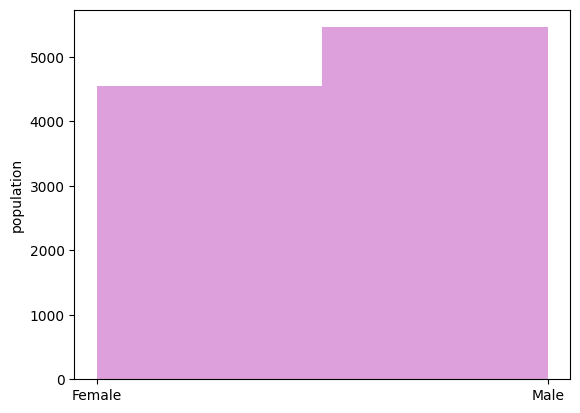

In [374]:
pt.hist(df['Gender'], bins=2, color='plum')
pt.ylabel('population')
pt.show()

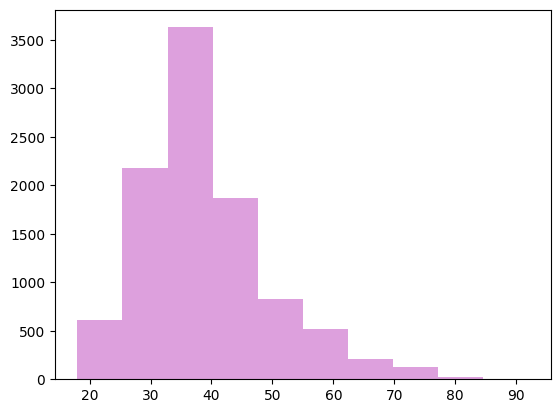

In [375]:
pt.hist(df['Age'], color='plum');

In [376]:
d = df['Geography'].value_counts()
d

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

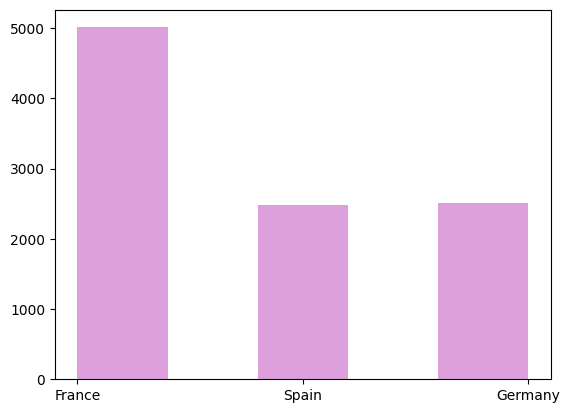

In [377]:
pt.hist(df['Geography'], bins=5, color='plum');

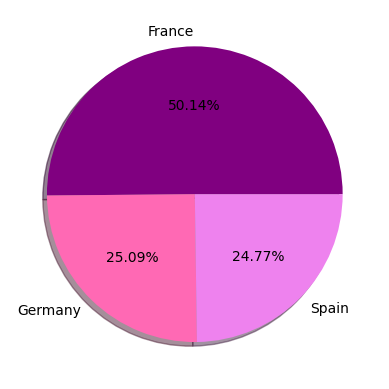

In [378]:
pt.pie(df['Geography'].value_counts(), colors=['purple','hotpink','violet'], shadow=True,
       labels=['France','Germany','Spain'],
       autopct='%1.2f%%');

In [379]:
a = len(df[(df['Geography']=='France') & (df['Exited']==1)])
b = len(df[(df['Geography']=='Germany') & (df['Exited']==1)])
c = len(df[(df['Geography']=='Spain') & (df['Exited']==1)])
print('Exited from France',a,'which is',a/d[0]*100,'%')
print('Exited from Germany',b,'which is',b/d[1]*100,'%')
print('Exited from Spain',c,'which is',c/d[2]*100,'%')

Exited from France 810 which is 16.15476665337056 %
Exited from Germany 814 which is 32.44320446392985 %
Exited from Spain 413 which is 16.673395236172787 %


In [380]:
df_other = df[df['Geography']!='France']
len(df_other)

4986

In [381]:
df_france = df[df['Geography']=='France']
len(df_france)

5014

In [382]:
df_france = resample(df_france, replace=False,
                     n_samples=int(np.mean([len(df[df['Geography']=='Germany']),len(df[df['Geography']=='Spain'])])))
len(df_france)

2493

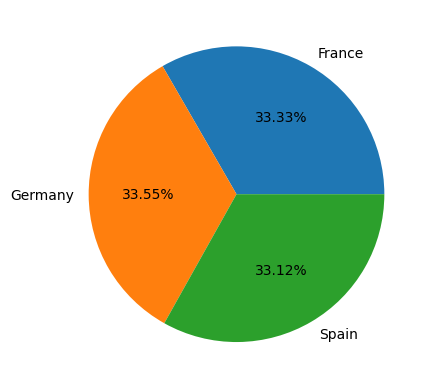

In [383]:
df = pd.concat([df_other,df_france])
df.groupby('Geography').size().plot(kind='pie', autopct='%1.2f%%');

In [384]:
g = df['HasCrCard'].value_counts()
g

1    5247
0    2232
Name: HasCrCard, dtype: int64

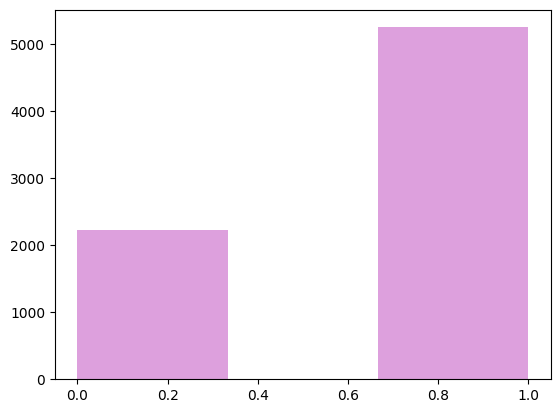

In [385]:
pt.hist(df['HasCrCard'], bins=3, color='plum');

In [386]:
e = len(df[(df['HasCrCard']==1) & (df['Exited']==1)])
f = len(df[(df['HasCrCard']==0) & (df['Exited']==1)])
print('Exited having a credit card is',e,'which is',e/g[0]*100,'%')
print('Exited without having a credit card is',f,'which is',f/g[1]*100,'%')

Exited having a credit card is 1129 which is 50.58243727598566 %
Exited without having a credit card is 496 which is 9.45302077377549 %


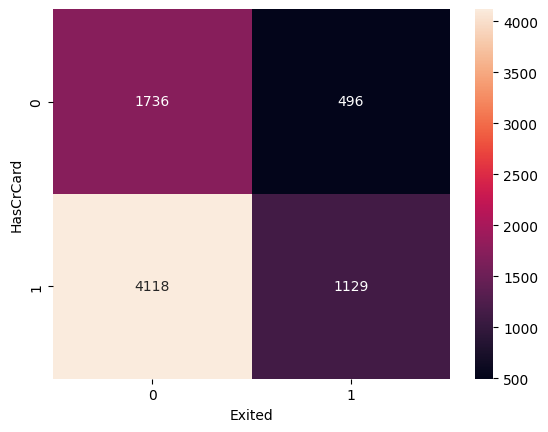

In [387]:
sb.heatmap(pd.crosstab(df['HasCrCard'], df['Exited']), annot=True, fmt='g'); #the fmt parameter is used to format
                                                                             #the annotations from scientific
                                                                             #notation to integers.

In [388]:
h = df['IsActiveMember'].value_counts()
h

1    3888
0    3591
Name: IsActiveMember, dtype: int64

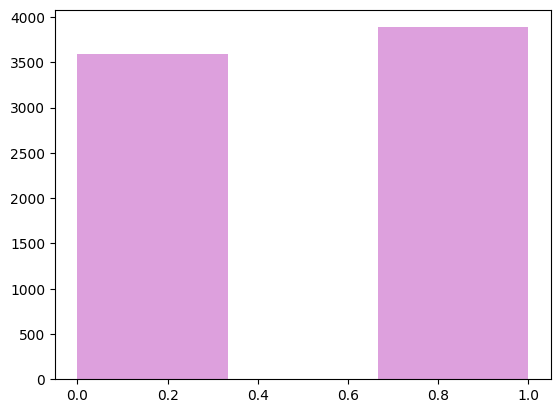

In [389]:
pt.hist(df['IsActiveMember'], bins=3, color='plum');

In [390]:
i = len(df[(df['IsActiveMember']==1)&(df['Exited']==1)])
j = i = len(df[(df['IsActiveMember']==0)&(df['Exited']==1)])
print('Exited being an Active member',i,'which is',i/h[0]*100,'%')
print('Exited not being an Active member',j,'which is',j/h[1]*100,'%')

Exited being an Active member 1043 which is 29.0448343079922 %
Exited not being an Active member 1043 which is 26.8261316872428 %


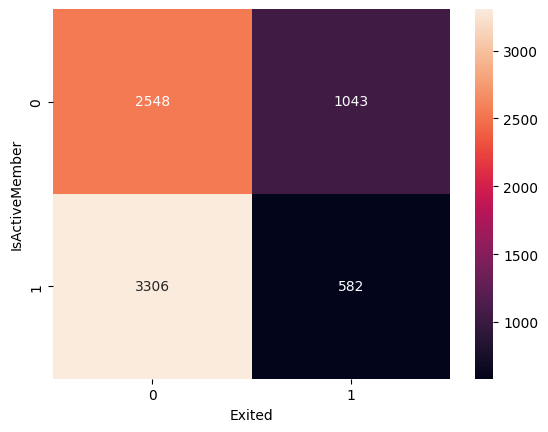

In [391]:
sb.heatmap(pd.crosstab(df['IsActiveMember'], df['Exited']), annot=True, fmt='g');

In [392]:
pd.crosstab([df['Geography'],df['Gender'],df['HasCrCard']], df['Exited'])

Exited                        0    1
Geography Gender HasCrCard          
France    Female 0          279   71
                 1          610  154
          Male   0          355   53
                 1          851  120
Germany   Female 0          219  131
                 1          526  317
          Male   0          262  106
                 1          688  260
Spain     Female 0          244   74
                 1          614  157
          Male   0          377   61
                 1          829  121

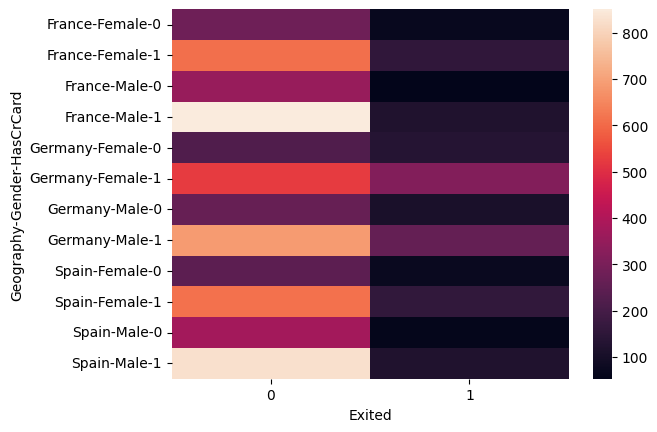

In [393]:
sb.heatmap(pd.crosstab([df['Geography'],df['Gender'],df['HasCrCard']], df['Exited']));

In [394]:
df['Tenure'].value_counts()

2     796
8     796
3     769
5     760
7     759
1     758
9     732
4     722
6     690
10    379
0     318
Name: Tenure, dtype: int64

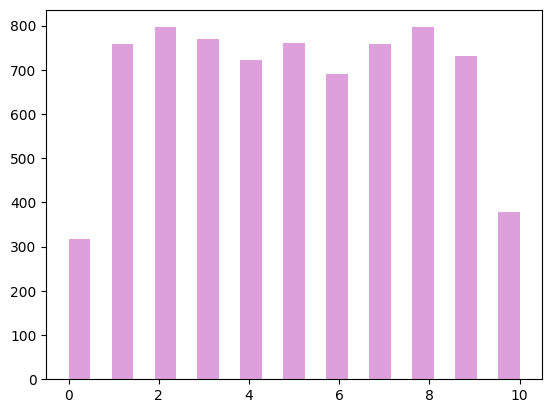

In [395]:
pt.hist(df['Tenure'],bins=21,color='plum');

In [396]:
df_ten = df[(df['Tenure']==0) | (df['Tenure']==10)]
df_others = df[(df['Tenure']!=0) | (df['Tenure']!=10)]

In [397]:
df_ten['Tenure'].value_counts()

10    379
0     318
Name: Tenure, dtype: int64

In [398]:
df_ten = resample(df_ten, replace=True, n_samples = 400)

In [399]:
df = pd.concat([df_ten, df_others])

In [400]:
df['Tenure'].value_counts()

2     796
8     796
3     769
5     760
7     759
1     758
9     732
4     722
6     690
10    584
0     513
Name: Tenure, dtype: int64

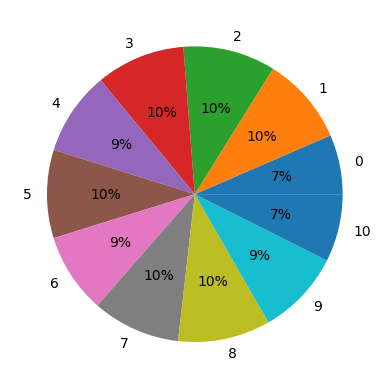

In [401]:
df.groupby('Tenure').size().plot(kind='pie', autopct='%1.0f%%');

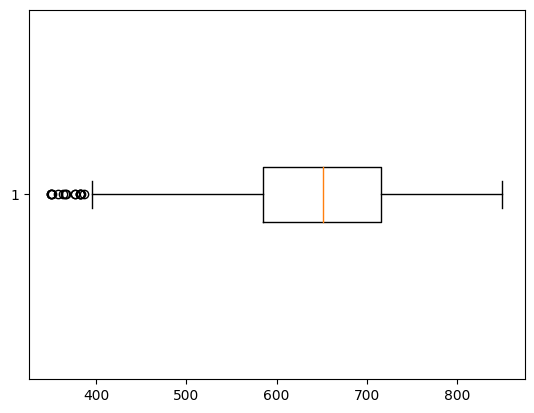

In [402]:
pt.boxplot(df['CreditScore'], vert=0); #outliers are seen to the left of the 400 mark.

In [403]:
df = df[df['CreditScore']>=390]

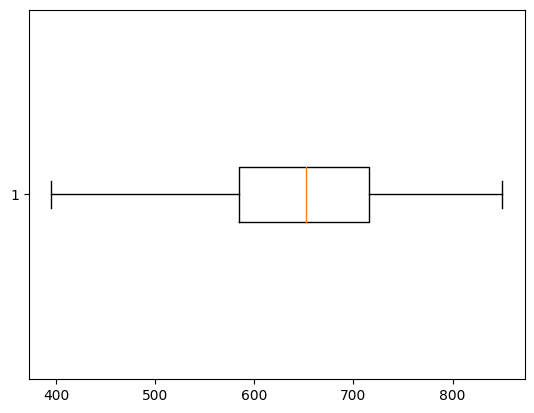

In [404]:
pt.boxplot(df['CreditScore'], vert=0);

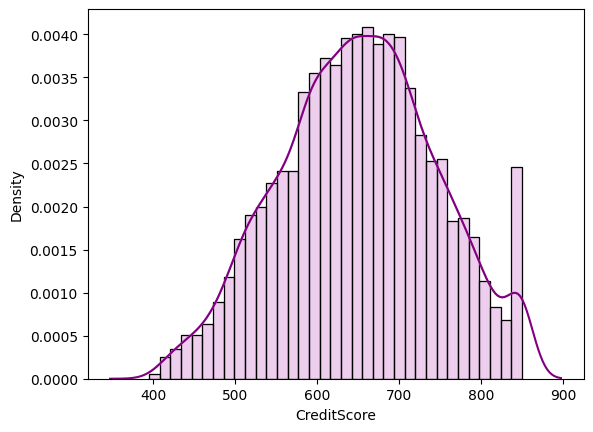

In [405]:
sb.histplot(df['CreditScore'], kde=True, color='plum', stat='density')
sb.kdeplot(df['CreditScore'], color='purple');

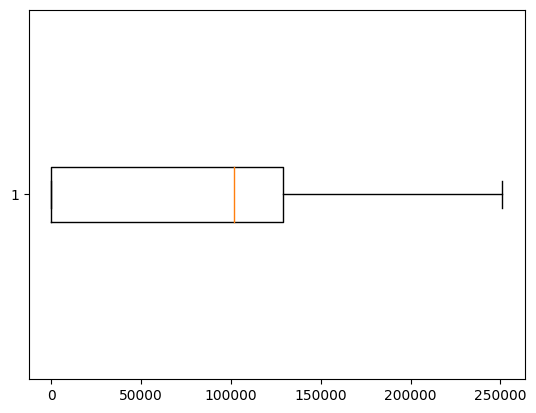

In [406]:
pt.boxplot(df['Balance'], vert=0); #shows negative skewness

In [407]:
df['Balance'].skew()

-0.28042410337311763

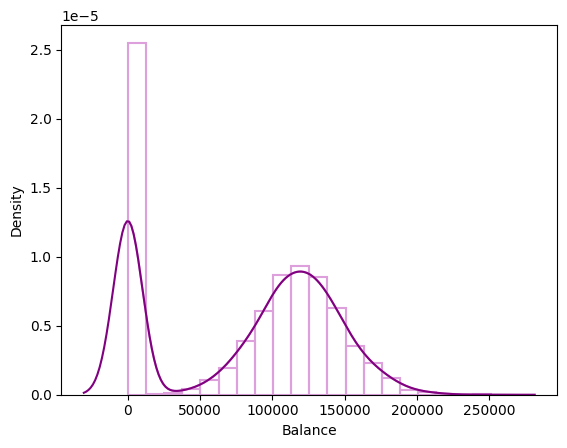

In [408]:
sb.histplot(df['Balance'], kde=True, color='plum', stat='density', fill=False)
sb.kdeplot(df['Balance'], color='purple');

In [409]:
a1 = len(df[df['Balance']==0])
b1 = len(df['Balance'])
print("%.2f" %(a1/b1*100),'% of the data has 0 Balance.')

32.01 % of the data has 0 Balance.


In [410]:
df = df[df['Balance']!=0]

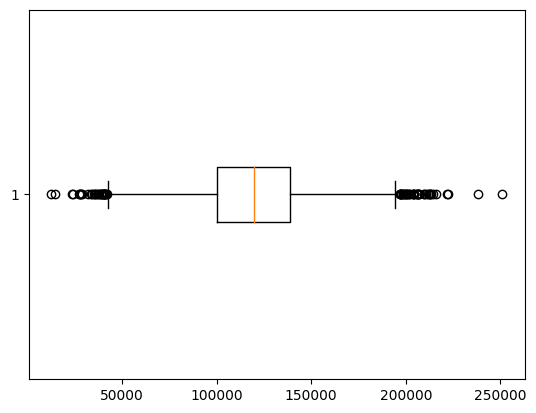

In [411]:
pt.boxplot(df['Balance'], vert=0);

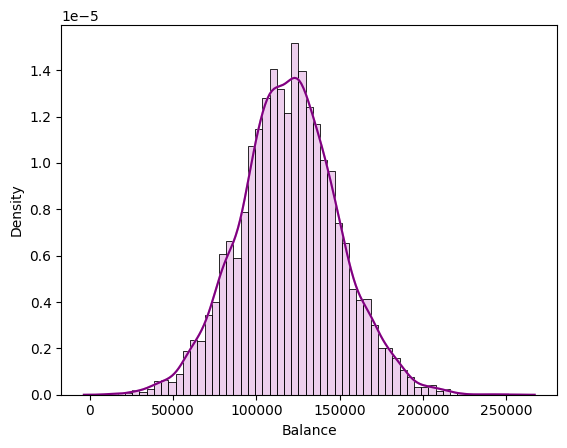

In [412]:
sb.histplot(df['Balance'], kde=True, color='plum', stat='density')
sb.kdeplot(df['Balance'], color='purple');

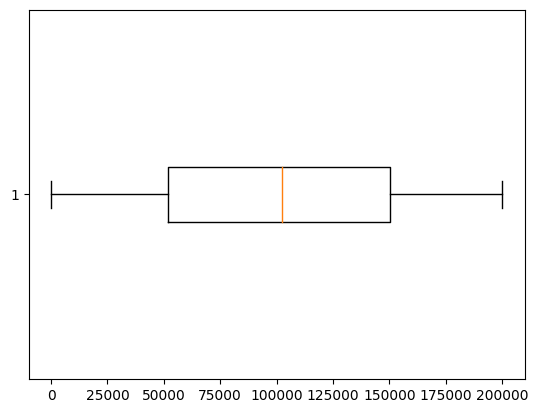

In [413]:
pt.boxplot(df['EstimatedSalary'], vert=0);

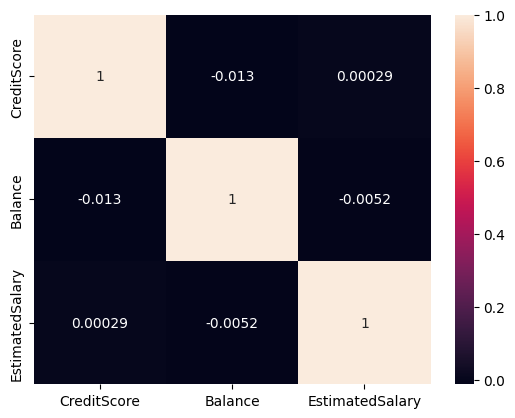

In [414]:
corr = df[['CreditScore','Balance','EstimatedSalary']]
corr = corr.corr()
sb.heatmap(corr, annot=True);

In [415]:
df['NumOfProducts'].value_counts()

1    3409
2    1751
3     149
4      38
Name: NumOfProducts, dtype: int64

In [416]:
pd.crosstab(df['NumOfProducts'], df['Exited'])

Exited,0,1
NumOfProducts,,
1,2451,958
2,1520,231
3,10,139
4,0,38


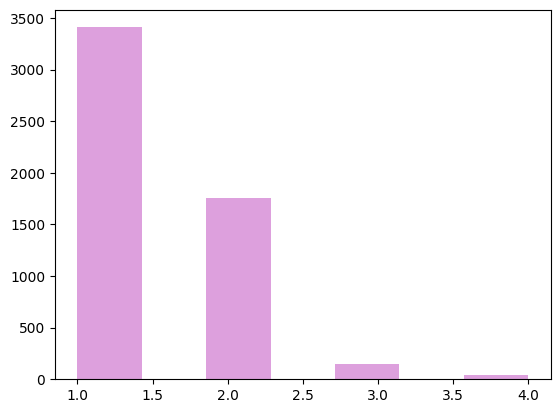

In [417]:
pt.hist(df['NumOfProducts'], bins=7, color='plum');

In [418]:
df.drop(df[df['NumOfProducts']==4].index, inplace=True)

In [419]:
df['NumOfProducts'].value_counts()

1    3409
2    1751
3     149
Name: NumOfProducts, dtype: int64

In [420]:
#split into independent and dependent variables from here
x = df.iloc[:,0:10]
y = df.iloc[:,10]

In [421]:
x.shape

(5309, 10)

In [422]:
df_corr = df.corr(numeric_only=True)
df_corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.002868,0.006624,-0.014108,0.007792,-0.023436,0.025708,0.001244,-0.026184
Age,-0.002868,1.000000,0.017246,-0.009229,-0.022261,-0.025982,0.061790,-0.003571,0.295080
Tenure,0.006624,0.017246,1.000000,-0.002788,-0.002707,0.024601,-0.046958,0.008468,-0.002674
Balance,-0.014108,-0.009229,-0.002788,1.000000,0.002608,0.004531,-0.009668,-0.003747,0.008358
NumOfProducts,0.007792,-0.022261,-0.002707,0.002608,1.000000,0.008848,-0.004330,0.025468,-0.002843
HasCrCard,-0.023436,-0.025982,0.024601,0.004531,0.008848,1.000000,-0.021060,-0.012102,-0.003812
IsActiveMember,0.025708,0.061790,-0.046958,-0.009668,-0.004330,-0.021060,1.000000,-0.010338,-0.184889
EstimatedSalary,0.001244,-0.003571,0.008468,-0.003747,0.025468,-0.012102,-0.010338,1.000000,-0.000090
Exited,-0.026184,0.295080,-0.002674,0.008358,-0.002843,-0.003812,-0.184889,-0.000090,1.000000


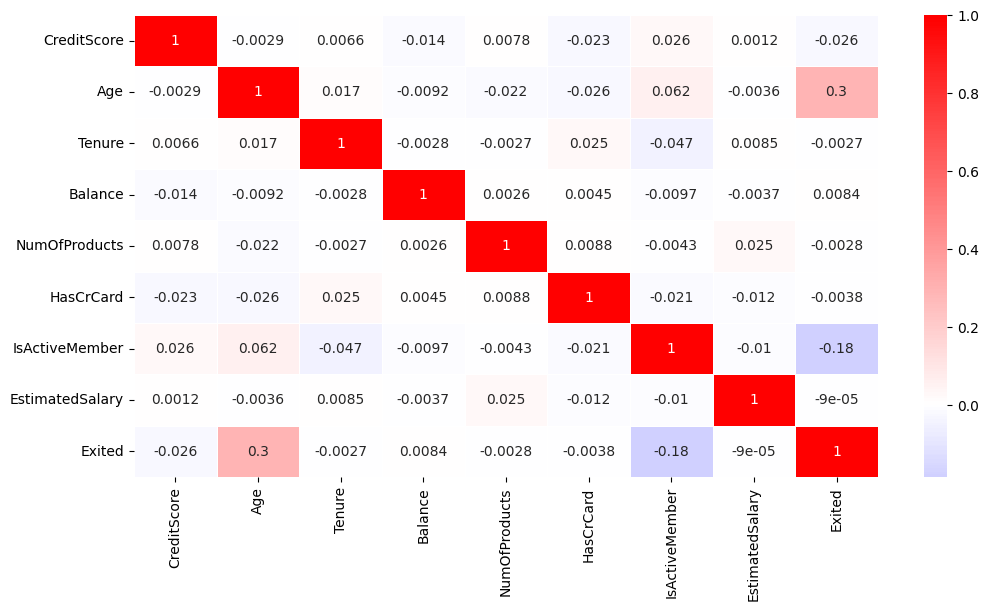

In [423]:
fig,ax = pt.subplots(figsize=(12,6))
sb.heatmap(df_corr, annot=True, linewidths=0.5, center=0, cmap='bwr')
pt.show()

In [424]:
scale = scaler()
x[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']] = \
scale.fit_transform(x[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']])

In [425]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
3561,0.668132,Germany,Female,0.175676,10,0.475504,2,1,0,0.947099
3186,0.531868,Germany,Female,0.243243,10,0.559016,2,1,1,0.483345
263,0.630769,France,Female,0.108108,0,0.411824,1,0,1,0.559452
8364,0.112088,Spain,Female,0.364865,10,0.472794,1,1,1,0.641377
1729,0.531868,France,Male,0.202703,0,0.502421,2,0,1,0.372960
...,...,...,...,...,...,...,...,...,...,...
3270,1.000000,France,Female,0.202703,7,0.442650,1,1,0,0.920049
8947,0.672527,France,Female,0.337838,2,0.620525,1,0,1,0.186312
1803,0.400000,France,Female,0.108108,1,0.704882,1,0,0,0.617341
8162,0.496703,France,Male,0.121622,4,0.522333,1,1,0,0.106234


In [426]:
x = pd.get_dummies(x, columns=['Geography', 'Gender'])
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
3561,0.668132,0.175676,10,0.475504,2,1,0,0.947099,0,1,0,1,0
3186,0.531868,0.243243,10,0.559016,2,1,1,0.483345,0,1,0,1,0
263,0.630769,0.108108,0,0.411824,1,0,1,0.559452,1,0,0,1,0
8364,0.112088,0.364865,10,0.472794,1,1,1,0.641377,0,0,1,1,0
1729,0.531868,0.202703,0,0.502421,2,0,1,0.372960,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3270,1.000000,0.202703,7,0.442650,1,1,0,0.920049,1,0,0,1,0
8947,0.672527,0.337838,2,0.620525,1,0,1,0.186312,1,0,0,1,0
1803,0.400000,0.108108,1,0.704882,1,0,0,0.617341,1,0,0,1,0
8162,0.496703,0.121622,4,0.522333,1,1,0,0.106234,1,0,0,0,1
